# Projet Final de Kit Data Science

Auteur : Alexandre Bréboin

Nous allons nous interesser à l'analyse de données du vendée globe. Pour les analyses, la méthode est la suivante :
Les données sont prélevées sur le site du vendée globe (https://www.vendeeglobe.org/fr/classement) une fois par jour, avec le dataset de 21h. Sur les dataset, les données sont disponibles pour les dernières 30 minutes, depuis le dernier classement (c'est à dire 4 heures) et pour les dernières 24 heures. Vu que nous récupérons un dataset par jour, nous garderons uniquement les données pour les dernières 24 heures.
 
Tout d'abord, je me suis plongé dans le sujet en allant regarder l'état de la course et la progression des différents bateaux depuis le premier jour.
J'ai remarqué que plus la course avançait, plus l'écart se creusait entre les bateaux disposant d'un foil et ceux n'en ayant pas.

Une première analyse sera donc porté sur l'impact du foil sur la vitesse des bateaux. Le foil n'étant pas disponible dans les données récupérées sur le site du véndée globe, nous ferons une jointure avec un fichier que j'ai confectionné.

In [6]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import os

In [7]:
# Permet de récupérer la liste des dataset présents dans le dossier les regroupants, et de la nettoyer
liste_xlsx_unclean = os.listdir('Rankings/')
if 'DS_Store' in liste_xlsx_unclean:
    liste_xlsx_unclean.remove('.DS_Store')
print(liste_xlsx_unclean)
liste_xlsx = []
for xlsx in liste_xlsx_unclean:
    if '~$' in xlsx:
        xlsx = xlsx[2:]
    liste_xlsx.append(xlsx)
liste_xlsx = sorted(liste_xlsx)
print(liste_xlsx)

['vendeeglobe_20201127_210000.xlsx', 'vendeeglobe_20201109_210000.xlsx', 'vendeeglobe_20201115_210000.xlsx', 'vendeeglobe_20201122_210000.xlsx', 'vendeeglobe_20201110_210000.xlsx', 'vendeeglobe_20201119_210000.xlsx', 'vendeeglobe_20201128_210000.xlsx', 'vendeeglobe_20201113_210000.xlsx', 'vendeeglobe_20201121_210000.xlsx', 'vendeeglobe_20201116_210000.xlsx', 'vendeeglobe_20201124_210000.xlsx', 'vendeeglobe_20201118_210000.xlsx', 'vendeeglobe_20201111_210000.xlsx', '~$vendeeglobe_20201120_210000.xlsx', 'vendeeglobe_20201123_210000.xlsx', 'vendeeglobe_20201114_210000.xlsx', 'vendeeglobe_20201126_210000.xlsx', 'vendeeglobe_20201108_210000.xlsx', '~$vendeeglobe_20201108_210000.xlsx', 'vendeeglobe_20201125_210000.xlsx', 'vendeeglobe_20201117_210000.xlsx', 'vendeeglobe_20201120_210000.xlsx', 'vendeeglobe_20201112_210000.xlsx']
['vendeeglobe_20201108_210000.xlsx', 'vendeeglobe_20201108_210000.xlsx', 'vendeeglobe_20201109_210000.xlsx', 'vendeeglobe_20201110_210000.xlsx', 'vendeeglobe_20201111_

In [8]:
# Nettoyage des datasets et jointure avec le fichier contenant les informations sur les foils
ranking_dispo = {}
ranking = []
count = 0
foils = pd.read_excel('foils.xlsx', index_col= 0)
foils = foils.replace(r'\n',' ', regex=True)
foils.index = foils.index.str.replace(r'\n',' ', regex=True)
for xlsx in liste_xlsx:
    ranking_dispo.update({f'ranking_{xlsx[-14:-12]}_{xlsx[-16:-14]}_{xlsx[-11:-9]}h': count})
    ranking.append(0)
    ranking[count] = pd.read_excel('Rankings/'+xlsx, header = 4,index_col=3)
    ranking[count] = ranking[count].replace(r'\n',' ', regex=True)
    ranking[count] = ranking[count].rename(columns={"Unnamed: 1": "Rank", "Unnamed: 2": "Nat\nVoile","Unnamed: 19" : "Distance to Finish","Unnamed: 20" : "Distance to Leader"})
    ranking[count] = ranking[count].drop('Unnamed: 0',axis=1)
    ranking[count].index = ranking[count].index.str.replace(r'\n',' ', regex=True)
    ranking[count].index = ranking[count].index.str.replace('Hugo Boss', 'HUGO BOSS', regex=True)
    ranking[count].columns = ranking[count].columns.str.replace(r'\n',' ', regex=True)
    ranking[count].drop(['Cap Heading','Vitesse Speed','VMG VMG','Distance Distance','Cap Heading.1','Vitesse Speed.1','VMG VMG.1','Distance Distance.1'], axis=1, inplace=True)
    ranking[count] = ranking[count][0:33]
    ranking[count] = pd.concat([ranking[count], foils], axis=1)
    count = count + 1
ranking[14].head()

,Rank,Nat Voile,Heure FR Hour FR,Latitude Latitude,Longitude Longitude,Cap Heading.2,Vitesse Speed.2,VMG VMG.2,Distance Distance.2,Distance to Finish,Distance to Leader,Foils
Alex Thomson HUGO BOSS,1,GBR 99,21:30 FR,17°18.82'S,31°27.89'W,170°,20.6 kts,20.1 kts,493.4 nm,20408.0 nm,0.0 nm,1
Thomas Ruyant LinkedOut,2,FRA 59,21:00 FR -30min,16°25.53'S,29°44.13'W,169°,20.7 kts,20.5 kts,496.0 nm,20414.9 nm,6.9 nm,1
Charlie Dalin APIVIA,3,FRA 79,21:30 FR,15°54.10'S,30°42.82'W,177°,20.2 kts,19.7 kts,486.0 nm,20465.6 nm,57.6 nm,1
Jean Le Cam Yes we Cam !,4,FRA 01,21:30 FR,12°20.33'S,29°59.00'W,176°,16.3 kts,16.0 kts,390.4 nm,20650.7 nm,242.7 nm,0
Louis Burton Bureau Vallée 2,5,FRA 18,21:30 FR,12°33.15'S,31°20.78'W,180°,18.7 kts,18.0 kts,449.7 nm,20665.5 nm,257.6 nm,1


In [9]:
# Permet de voir l'index de la liste de dataframes "ranking". 
# Par exemple ranking[0] correspond au classement du 8/11 à 21h.
ranking_dispo

{'ranking_08_11_21h': 1,
 'ranking_09_11_21h': 2,
 'ranking_10_11_21h': 3,
 'ranking_11_11_21h': 4,
 'ranking_12_11_21h': 5,
 'ranking_13_11_21h': 6,
 'ranking_14_11_21h': 7,
 'ranking_15_11_21h': 8,
 'ranking_16_11_21h': 9,
 'ranking_17_11_21h': 10,
 'ranking_18_11_21h': 11,
 'ranking_19_11_21h': 12,
 'ranking_20_11_21h': 14,
 'ranking_21_11_21h': 15,
 'ranking_22_11_21h': 16,
 'ranking_23_11_21h': 17,
 'ranking_24_11_21h': 18,
 'ranking_25_11_21h': 19,
 'ranking_26_11_21h': 20,
 'ranking_27_11_21h': 21,
 'ranking_28_11_21h': 22}

Les datasets sont chargés, nous allons donc commencer l'analyse de l'impact des foils sur la vitesse des bateaux.
Afin de biaiser au minimum les données, nous allons comparer la moyenne des 5 premiers bateaux du dernier classement contenant ou non un foil. Ceci à pour but d'essayer de minimiser l'impact que pourrait avoir les retardataires sur la moyenne, certains ayant eu une casse et ayant prit pas mal de retard, les conditions météos sont de moins en moins similaire au fur et à mesure que la course s'étale.

In [10]:
# Permet de récupérer la moyenne des vitesses des 5 premiers du classement  avec foils et des 5 premiers
df_speed = pd.DataFrame(columns=('Speed without Foils','Speed with Foils'))
count_day = 1
for ranks in ranking:
    df1 = ranks.rename(columns={"Vitesse Speed.2": f"{count_day}"})[['Rank','Foils',f"{count_day}"]]
    speed_with_foil = df1.loc[df1['Foils']==1].head(5)
    speed_with_foil = speed_with_foil[f"{count_day}"].replace(r' kts','', regex=True).values
    speed_with_foil = mean(list(map(float, speed_with_foil)))
    speed_without_foil = df1.loc[df1['Foils']==0].head(5)
    speed_without_foil = speed_without_foil[f"{count_day}"].replace(r' kts','', regex=True).values
    speed_without_foil = mean(list(map(float, speed_without_foil)))
    df_speed.loc[count_day] = [speed_without_foil,speed_with_foil]
    count_day = count_day + 1
    
df_speed

,Speed without Foils,Speed with Foils
1,5.88,5.66
2,5.88,5.66
3,8.82,9.24
4,8.62,8.62
5,11.30,11.32
6,12.88,13.00
7,14.00,15.04
8,13.08,13.50
9,11.30,15.32
10,16.72,19.60


Text(40, -50, 'V = ~12-13kts')

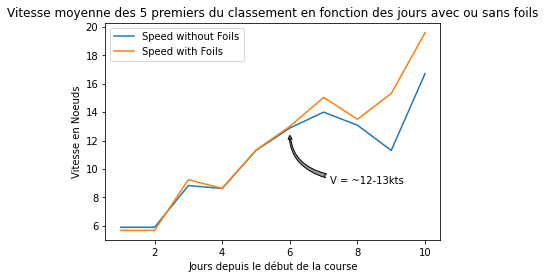

In [15]:
# Nous prenons ici les 15 premiers jours
plt = df_speed.loc[1:10].plot(title='Vitesse moyenne des 5 premiers du classement en fonction des jours avec ou sans foils')
plt.set_xlabel("Jours depuis le début de la course")
plt.set_ylabel("Vitesse en Noeuds")
plt.annotate('V = ~12-13kts', xy=(6,12.5), xycoords='data',
            xytext=(40,-50), textcoords='offset points',
            arrowprops=dict(arrowstyle='fancy',fc='0.6',
                            connectionstyle="angle3,angleA=0,angleB=-90"))

Nous voyons ici qu'un bateau posséndant un foil va gagner en vitesse par rapport à un bateau sans foil, à partir de 12-13 noeuds marins. C'est en effet à cette vitesse que le bateau "décolle" et permet de réduire les frottements, gagnant ainsi de la vitesse relativement aux bateaux ne possédant pas de foil. La courbe est à conditions similaires jusqu'au 7-8eme jour. Après cela, les bateaux avec foil, allant plus vite, prennent de l'avance et n'ont plus les mêmes conditions météos que les bateaux sans foil, ce qui biaise la courbe. Nous arrêtons donc la courbe au 10ème jour, car plus le temps avance moins elle est fiable.

Le foil est donc un net avantage sur le point de vue théorique, mais en pratique c'est aussi une prise de risque, car tout le poids du bateau est concentré sur le foil et sur la dérive. Comme nous avons pu le voir avec Alex Thomson, son bateau Hugo Boss présente des fissures dans la structure de la coque, probablement liées aux contraintes extrèmes imposées par le foil. Ce dernier a du naviguer à vitesse réduite perdant ainsi la tête de la course dans la nuit du vendredi au samedi 21/11.

La course n'est donc pas encore jouée !


Nous allons maintenant suivre les positions de deux skipers sur une carte. Nous allons prendre le premier skipper du classement possédant un foil, et le premier skipper du classement n'en possédant pas. Le Dimanche 22 novembre, lorsque j'ai fait ces recherches le 1er skipper possédant un foil était Thomas RUYANT, et celui n'en possédant pas était Jean LE CAM. Ces donc ces deux skippers que nous suivront au fur et à mesure des jours depuis le départ jusqu'au rendu du projet.

In [16]:
# La fonction réalisé lors du premier devoir maison ne couvrant pas les cas où les coordonées possèdent des points
# cardinaux, j'ai extrait un code de la page suivant :
# https://stackoverflow.com/questions/33997361/how-to-convert-degree-minute-second-to-degree-decimal

import re
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'W' or direction == 'S':
        dd *= -1
    return dd;
def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    res = dms2dd(parts[0], parts[1], parts[2], parts[3])

    return (res)

dd = parse_dms("31°27.89'S")
dd

-31.474722222222223

In [17]:
# Récupération des coordonées GPS de Thomas Ruyant et Jean Le Cam
df_coords_tr = pd.DataFrame(columns=('Latitude','Longitude'))
df_coords_jlc = pd.DataFrame(columns=('Latitude','Longitude'))
count_day = 1
for ranks in ranking:
    lat_tr = parse_dms(ranks.loc['Thomas Ruyant LinkedOut']['Latitude Latitude'])
    long_tr = parse_dms(ranks.loc['Thomas Ruyant LinkedOut']['Longitude Longitude'])
    lat_jlc = parse_dms(ranks.loc['Jean Le Cam Yes we Cam !']['Latitude Latitude'])
    long_jlc = parse_dms(ranks.loc['Jean Le Cam Yes we Cam !']['Longitude Longitude'])
    df_coords_tr.loc[count_day] = [lat_tr,long_tr]
    df_coords_jlc.loc[count_day] = [lat_jlc,long_jlc]
    count_day = count_day + 1

In [24]:
# Création de la carte et importation des points GPS des 2 skippers
import folium
m = folium.Map(location=[10, 0],
                   zoom_start=3,
                   tiles='Stamen Terrain')


group0 = folium.FeatureGroup(name='<span style=\\"color: red;\\">Red Ships Thomas Ruyant</span>')
group1 = folium.FeatureGroup(name='<span style=\\"color: blue;\\">Blue Ships Jean Le Cam</span>')
for i in range(1,len(df_coords_tr)):
    lat_tr = df_coords_tr.loc[i]['Latitude']
    long_tr = df_coords_tr.loc[i]['Longitude']
    lat_jlc = df_coords_jlc.loc[i]['Latitude']
    long_jlc = df_coords_jlc.loc[i]['Longitude']
    folium.Marker(location=[lat_tr, long_tr], popup=f'<i>Thomas Ruyant Jour {i}</i>',
                  icon=folium.Icon(color='red',icon="ship", prefix='fa')).add_to(group0)
    folium.Marker(location=[lat_jlc, long_jlc], popup=f'<i>Jean Le Cam Jour {i}</i>',
                  icon=folium.Icon(color='blue',icon="ship", prefix='fa')).add_to(group1)
group0.add_to(m)
group1.add_to(m)
folium.map.LayerControl('topright', collapsed=False).add_to(m)

m

La carte permet de suivre la position des 2 skippers, Jean le Cam en Bleu et Thomas Ruyant en Rouge.
Nous voyons que Thomas Ruyant à dépassé Jean Le Cam environ au jour 10, après le passage des vents calmes équatoriaux lorsque les bateaux sont rentrés dans les vents forts de l'anticyclone de Saint Hélène, présent dans la partie hémisphère sud de l'océan Atlantique. Nous voyons que l'écart se creuse car la vitesse des vents est plus élevée dans cette zone, maximisant l'avantage du foil. Sur les derniers jours avant le rendu du projet, nous voyons que Thomas Ruyant a pris plus d'un jour d'avance (quasiment 2) sur Jean Le Cam.